<a href="https://colab.research.google.com/github/GustavoBD-Dev/StatisticalTechniquesAndDataMining/blob/DataMining/DataMining/DescriptiveStatsDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINERÍA DE DATOS: PRÁCTICA 2


## Nombre: Gustavo Blas Duran

## 1) Analizar los datos y obtener las estadísticas descriptivas

Para el análisis del archivo realizamos la importación de las librerias, asi como la importación del archivo de los datos.

In [ ]:
# importacion de la librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# lectura de los datos en el archivo CSV
data = pd.read_csv('/content/Big5raw0.csv')
data.head(10)

,r,a,e,g,h,s,c,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53.0,1.0,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46.0,1.0,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14.0,2.0,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19.0,2.0,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25.0,2.0,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
5,13,31.0,1.0,2,1,2,US,1,5,2,...,4,2,1,3,3,5,5,4,5,3
6,5,20.0,1.0,2,1,5,US,5,1,5,...,3,1,5,1,4,1,4,3,3,4
7,4,23.0,2.0,1,1,2,IN,4,3,5,...,3,1,5,1,4,1,5,3,2,5
8,5,39.0,1.0,2,3,4,US,3,1,5,...,3,3,5,3,5,1,5,3,4,5
9,3,18.0,1.0,2,1,5,US,1,4,2,...,4,2,5,2,4,1,4,3,4,4


Relizamos el analisis de los tipos de datos de la base, para posterior a ello realizar el cálculo de las estadisticas descriptivas.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19719 entries, 0 to 19718
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   r       19719 non-null  int64  
 1   a       19718 non-null  float64
 2   e       19718 non-null  float64
 3   g       19719 non-null  int64  
 4   h       19719 non-null  int64  
 5   s       19719 non-null  int64  
 6   c       19707 non-null  object 
 7   E1      19719 non-null  int64  
 8   E2      19719 non-null  int64  
 9   E3      19719 non-null  int64  
 10  E4      19719 non-null  int64  
 11  E5      19719 non-null  int64  
 12  E6      19719 non-null  int64  
 13  E7      19719 non-null  int64  
 14  E8      19719 non-null  int64  
 15  E9      19719 non-null  int64  
 16  E10     19719 non-null  int64  
 17  N1      19719 non-null  int64  
 18  N2      19719 non-null  int64  
 19  N3      19719 non-null  int64  
 20  N4      19719 non-null  int64  
 21  N5      19719 non-null  int64  
 22

El conjunto de datos presenta una base con 57 variables, es decir 57 columnas, de las cuales solo una de ellas es una variable tipo *categoricas*, ya que al parecer muestran codigos de paises. Para el resto de las variables obtenemos las siguientes estadisticas descriptovas:

* Mediana
* Media
* Moda
* Desviación estandar
* Valor minimo
* Primer cuantil
* Segundo cuantil
* Tercer cuantil
* Valor máximo
* Rango de valores


In [ ]:
stats = [] # variable para almacenar los valores obtenidos

for i in data.columns:          # por cada una de las columnas
  if data[i].dtype == 'object': # si no es una variable numerica no se realizan los calculos
    # para la variable no numerica, obtenemos la moda y la agregamos a la variable donde se almacenan el resto de los valres
    stats.append(['c', None, None, data.mode()['c'].values[0], None, None, None, None, None, None, None, None, None])
    continue

  stats.append([i,              # nombre de la variable
  data[i].mean(),               # valor de la media
  data[i].median(),             # valor de la mediana
  data.mode()[i].values[0],     # valor de la moda
  data[i].std().round(3),       # desviación estandar
  data[i].var().round(3),       # varianza
  data[i].min(),                # valor minimo
  data[i].quantile(0.25),       # primer quantil
  data[i].quantile(0.5),        # segundo cuantil
  data[i].quantile(0.75),       # tercer cuantil
  data[i].max(),                # maximo valor
  data[i].max()-data[i].min(),  # rango de valores
  data[i].quantile(0.75)-data[i].quantile(0.25)])

# establecemos el nombre de las columnas para identidicarlas
stats = pd.DataFrame(stats,columns=['Feature','Mean','Median','Mode','Std','Var','Min','Q1','Q2','Q3','Max','Range','Q3-Q1'])
#stats = stats.round(3).sort_values('Feature', ascending=True).set_index('Feature')
stats

,Feature,Mean,Median,Mode,Std,Var,Min,Q1,Q2,Q3,Max,Range,Q3-Q1
0,r,5.476190,3.0,3,21.701,4.709470e+02,0.0,3.0,3.0,8.0,3000.0,3000.0,5.0
1,a,50769.610711,22.0,18.0,7121452.497,5.071509e+13,13.0,18.0,22.0,31.0,999999999.0,999999986.0,13.0
2,e,1.365098,1.0,1.0,0.489,2.390000e-01,0.0,1.0,1.0,2.0,2.0,2.0,1.0
3,g,1.623662,2.0,2,0.874,7.640000e-01,0.0,1.0,2.0,2.0,99.0,99.0,1.0
4,h,1.131498,1.0,1,0.439,1.930000e-01,0.0,1.0,1.0,1.0,20.0,20.0,0.0
5,s,1.953192,1.0,1,1.510,2.281000e+00,1.0,1.0,1.0,2.0,20.0,19.0,1.0
6,c,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E1,2.628937,3.0,3,1.233,1.519000e+00,0.0,2.0,3.0,4.0,5.0,5.0,2.0
8,E2,2.759724,3.0,2,1.314,1.726000e+00,0.0,2.0,3.0,4.0,5.0,5.0,2.0
9,E3,3.416755,4.0,4,1.237,1.530000e+00,0.0,3.0,4.0,4.0,5.0,5.0,1.0


## 2) Seleccionar y justificar 4 variables cuantitativas


Variables (solo las 3 primeras) con la desviacion estandar mayor a 1:

*   a
*   r
*   s

Una alta desviación estándar indica que los datos son muy dispersos, lo que sugiere que la variable puede contener información importante y discriminatoria, se obtienen los siguientes valores como resultado.

*   c:

Al ser una variable `no numerica` nos ayudaria a realizar el analisis a traves de agrupacion de datos, por ello es una de las variables seleccionadas.

In [ ]:
rows_with_var_most_than_1 = stats[stats['Var'] > 1]
rows_with_var_most_than_1.sort_values('Var', ascending=False).head(5)

,Feature,Mean,Median,Mode,Std,Var,Min,Q1,Q2,Q3,Max,Range,Q3-Q1
1,a,50769.610711,22.0,18.0,7121452.497,5.071509e+13,13.0,18.0,22.0,31.0,999999999.0,999999986.0,13.0
0,r,5.476190,3.0,3,21.701,4.709470e+02,0.0,3.0,3.0,8.0,3000.0,3000.0,5.0
5,s,1.953192,1.0,1,1.510,2.281000e+00,1.0,1.0,1.0,2.0,20.0,19.0,1.0
13,E7,2.867285,3.0,1,1.432,2.050000e+00,0.0,2.0,3.0,4.0,5.0,5.0,2.0
42,C6,2.922866,3.0,2,1.399,1.958000e+00,0.0,2.0,3.0,4.0,5.0,5.0,2.0


Con el análisis de la media y la mediana podemos determinar que pueden existir valores atipicos, ya que existe una gran diferencia entre estos valores, no se considera el valor de la media para determinar a las variables.

In [ ]:
row_with_highest_median = stats.loc[stats['Mean'].idxmax()]
row_with_highest_median

,1
Feature,a
Mean,50769.610711
Median,22.0
Mode,18.0
Std,7121452.497
Var,50715085672774.929688
Min,13.0
Q1,18.0
Q2,22.0
Q3,31.0


Identificacion de outliers con los quantiles 1 y 3, variables con mayor diferencia entre estos dos valores:

Con los valores correspondientes al primer y tercer cuartil, al existir una gran diferencia entre ellos, puede indicar una alta variabilidad o presencia de outliers, las variables siguientes muestran una gran diferencia:

*   a
*   r

In [ ]:
rows_with_highest_iqr = stats.sort_values('Q3-Q1', ascending=False).head(10)
rows_with_highest_iqr


,Feature,Mean,Median,Mode,Std,Var,Min,Q1,Q2,Q3,Max,Range,Q3-Q1
1,a,50769.610711,22.0,18.0,7121452.497,5.071509e+13,13.0,18.0,22.0,31.0,999999999.0,999999986.0,13.0
0,r,5.476190,3.0,3,21.701,4.709470e+02,0.0,3.0,3.0,8.0,3000.0,3000.0,5.0
11,E5,3.432223,4.0,4,1.282,1.644000e+00,0.0,2.0,4.0,5.0,5.0,5.0,3.0
39,C3,3.983011,4.0,4,1.003,1.006000e+00,0.0,3.0,4.0,5.0,5.0,5.0,2.0
28,A2,3.926568,4.0,5,1.079,1.163000e+00,0.0,3.0,4.0,5.0,5.0,5.0,2.0
31,A5,2.165982,2.0,2,1.142,1.304000e+00,0.0,1.0,2.0,3.0,5.0,5.0,2.0
32,A6,3.896090,4.0,5,1.130,1.278000e+00,0.0,3.0,4.0,5.0,5.0,5.0,2.0
33,A7,2.160657,2.0,2,1.132,1.282000e+00,0.0,1.0,2.0,3.0,5.0,5.0,2.0
34,A8,3.766367,4.0,4,1.036,1.074000e+00,0.0,3.0,4.0,5.0,5.0,5.0,2.0
35,A9,3.944723,4.0,4,1.085,1.178000e+00,0.0,3.0,4.0,5.0,5.0,5.0,2.0


La variable ´c´ cuenta con 158 distintos valores, de los cuales cada uno de ellos tiene un numero determinado de frecuencia.

In [ ]:
data['c'].value_counts()

,count
c,
US,8752
GB,1531
IN,1463
AU,974
CA,924
...,...
AG,1
BF,1
IM,1


## 3) Visualizar datos: sugerir graficos mas representativos

Como primer gráfico se generan diagrama de cajas para las variables `a, r, s, h, g` , a través de estos diagramas podemos identificar la distribucion de los datos asi como los outliers.

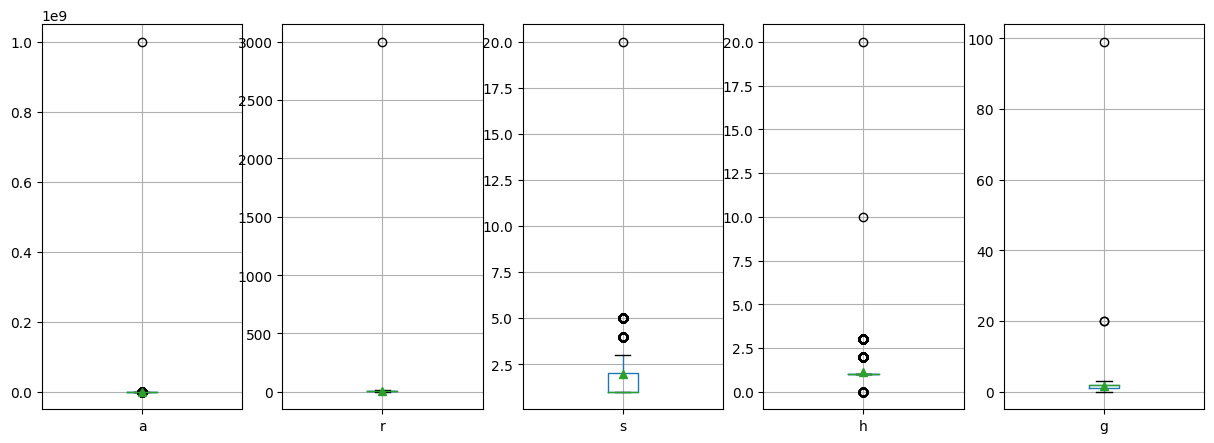

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
data[['a']].boxplot(ax=axes[0], showmeans=True, showfliers=True)
data[['r']].boxplot(ax=axes[1], showmeans=True, showfliers=True)
data[['s']].boxplot(ax=axes[2], showmeans=True, showfliers=True)
data[['h']].boxplot(ax=axes[3], showmeans=True, showfliers=True)
data[['g']].boxplot(ax=axes[4], showmeans=True, showfliers=True)
plt.show()


El segundo gráfico representativo histogranma, en la cual podemos observar la frecuencia de los datos.

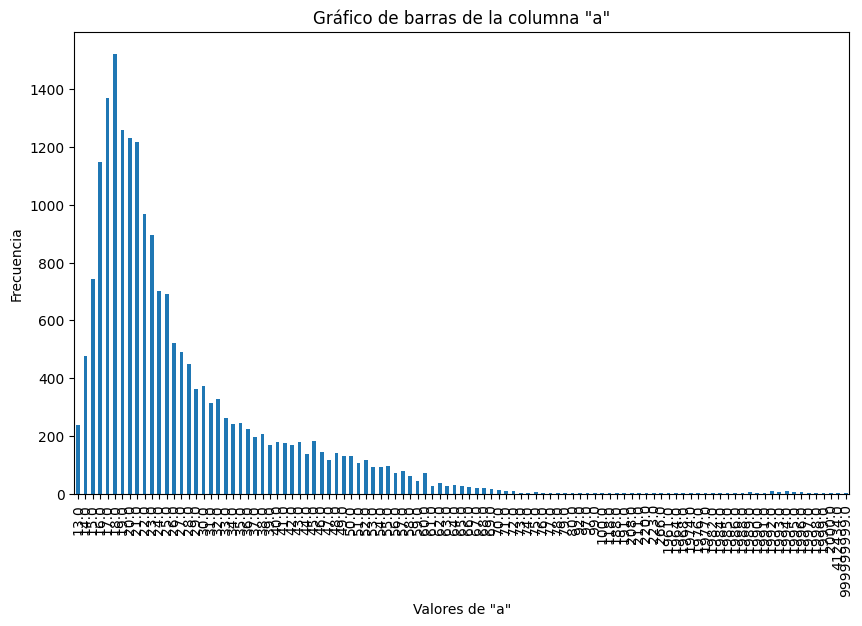

In [ ]:
import matplotlib.pyplot as plt

# crea un grafico de barras a partir de los datos de la columna "a"
data['a'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Valores de "a"')
plt.ylabel('Frecuencia')
plt.title('Gráfico de barras de la columna "a"')
plt.show()


El tercer grafico de es el grafico de "pay", a traves de este podemos observar el porcentaje de cada uno de los valores con respecto al total.

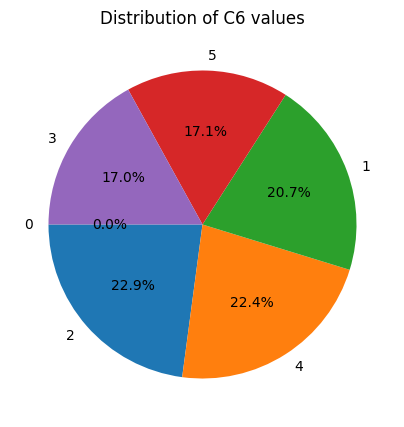

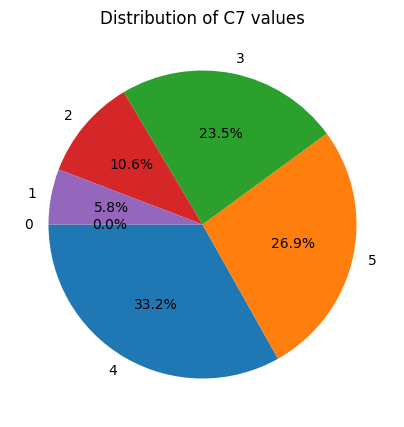

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts for the 'A1' column
value_counts = data['C6'].value_counts()

# Create a pie chart
plt.figure(figsize=(25, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of C6 values')
plt.show()

value_counts = data['C7'].value_counts()

plt.figure(figsize=(25, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of C7 values')
plt.show()


Otro grafico representativo es el grafico de violin, con el cual podemos observar la distribucion de los datos, al igual que el grafico de cajas.

<Axes: >

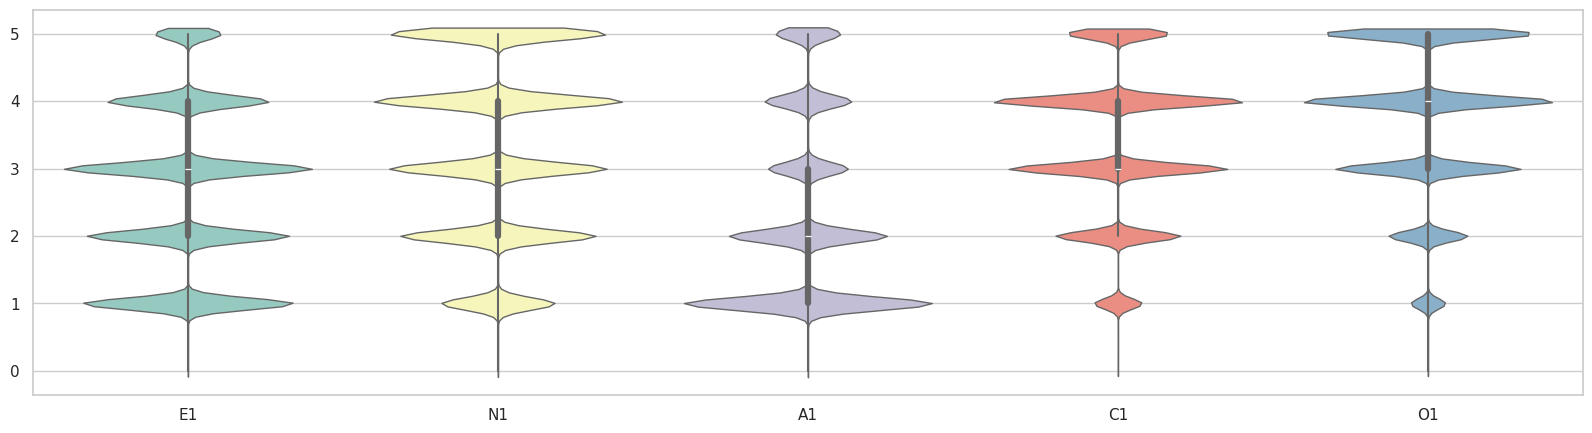

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# obtenemos el conjunto de datos
df = data

# obtenemos solo variables especificas a graficar
used_columns = ['E1', 'N1', 'A1', 'C1', 'O1']
df = df.loc[:, used_columns]

# Dibujamos el violin
f, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(data=df, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

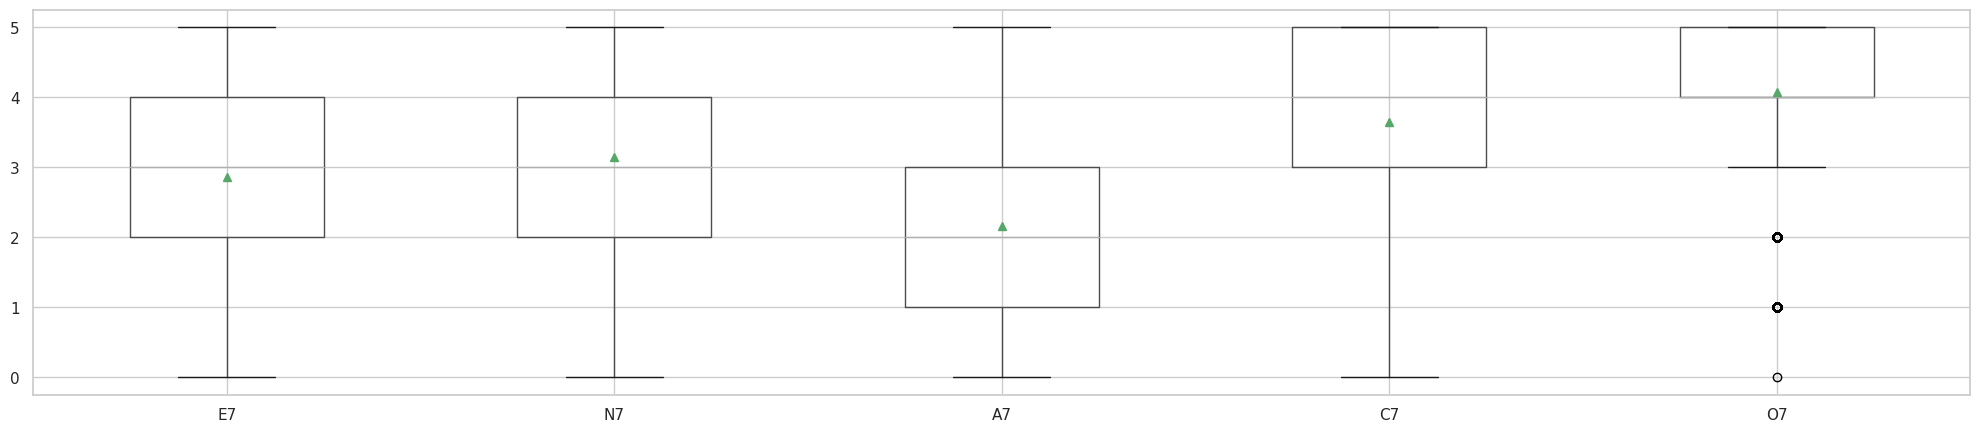

In [ ]:
import matplotlib.pyplot as plt
data[['E7', 'N7', 'A7', 'C7', 'O7']].boxplot(figsize=(25, 5), showmeans=True, showfliers=True)
plt.show()

## 4) Determinar cuantos valores faltan por cada atributo

Al utilizar dataframes en Python, podemos determinar rapidamente los valores faltantes y realizar un conteo de estos por cada variable.

In [ ]:
missing_values = data.isnull().sum() # suma de valores en null
missing_values.sort_values(ascending=False) # muestra los valores en orden ascendente


,0
c,12
e,1
a,1
r,0
C7,0
A6,0
A7,0
A8,0
A9,0
A10,0


## 5) Ejemplificar un proceso de transformación para valores faltantes o datos inconsistentes (“raros”)

Al manejar una base con datos numericos y no numericos, el proceso de transformación para las variables numericas puede establecerde de diversas formas, una de ellas es rellenar con la media, en donde los campos que no cuentan con un valor, son reemplazados por el valor de la media de los datos.

In [ ]:
# Rellenar los valores faltantes para las variables numericas con la media
for column in data.select_dtypes(include=['number']).columns:
  data[column].fillna(data[column].mean(), inplace=True)


Para las variables no numericas, se utilizar un metodo similar al anterior, en donde en vez de utilizar la media, se utiliza el valor de la moda:

In [ ]:
# Rellenar los valores faltantes para las variables numericas con la moda
for column in data.select_dtypes(include=['object']).columns:
  data[column].fillna(data[column].mode()[0], inplace=True)

Relizamos una inspección para buscar variables con valores faltantes.

In [ ]:
missing_values = data.isnull().sum() # suma de valores faltantes
missing_values

,0
r,0
a,0
e,0
g,0
h,0
s,0
c,0
E1,0
E2,0
E3,0


## 6) Obtener la matriz de correlación de hasta 10 variables. Interpretar el resultado

Se realiza la matriz de correlacion de todos los datos utulizando un mapa de calor para ubicar mejor las correlaciones entre las variables.

Las varibales que se encuentran iluminadas en color rojo, representan una correlacion fuerte con respecto a otras variables, sin embargo la mayor parte de ellas se encuentra en la diagional media, la cual representa la relación conrespecto a ella misma.

Seleccionamos las variables con la letra ´E´ para un analisis mas a detalle, ya que muestra los colores mas fuertes.

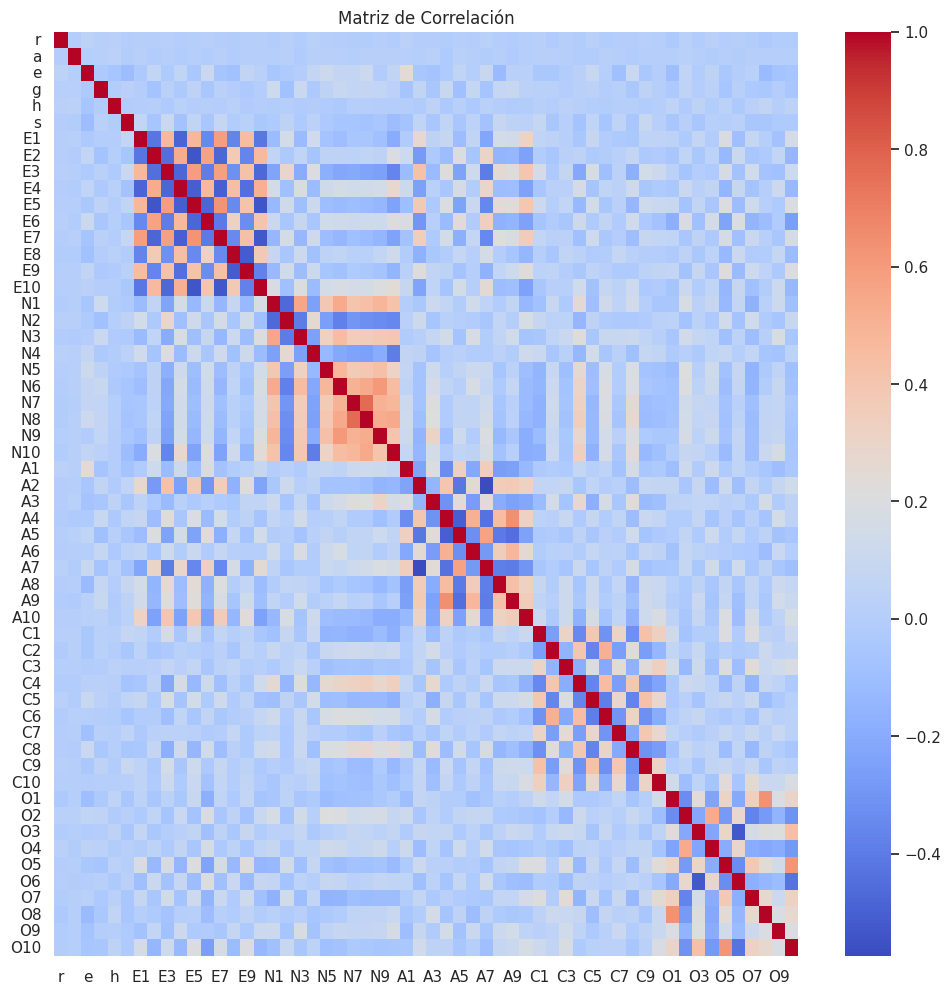

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar las primeras 10 variables numéricas
numeric_data = data.select_dtypes(include=np.number).iloc[:, :]

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Observamos los valores entre estas variables, los cuales se encuentran entre un rango de 40 y 60, lo que representa una correlacion no muy fuerte y no tan debil, causando confusión ya que es entre ellas mismas.


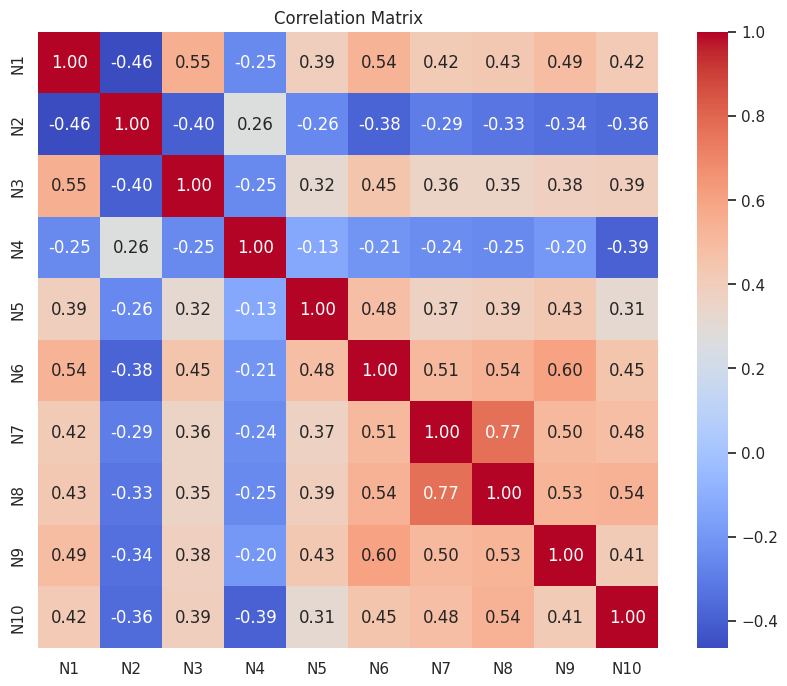

In [ ]:
import matplotlib.pyplot as plt

# seleccionamos columnas especificas
selected_columns = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']
correlation_matrix = data[selected_columns].corr()

# creacion del grafico con la matriz de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

De acuerdo con el analisis, existe una relacion entre estas variables, sin embargo, no se tiene un contexto de las variables, simplemente es un análisis de los datos en genral. Para una mejor interpretación es necesario tener contexto de las variables, para asi determinar mejores respuestas de este análisis.